# Notebook for plotting diagrams

https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

In [8]:
# imports
import os
import sys
import pandas as pd
from datetime import date
import pathlib

# Plot library
import plotly.graph_objects as go

# to enable local imports
module_path = os.path.abspath('../code')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
import dataFunctions
import resolveFunctions

today = date.today()
currentDir = pathlib.Path().absolute()
dataDir = os.path.join(currentDir, "data")

# get the cataloge
catalogeFilePath = os.path.join(currentDir, 'Catalogos_0412.xlsx')
df_cataloge = pd.read_excel(catalogeFilePath, sheet_name=None)

# Get the descriptors
descriptorsFilePath = os.path.join(currentDir, "Descriptores_0419.xlsx")
df_descriptors = pd.read_excel(descriptorsFilePath)

D:\OneDrive - bwedu\code


In [11]:
# Load the Data
df = dataFunctions.getCsvFromDate(dataDir, date(year=2020, month=6, day=13))

# Get total amount of cases in the Database
print("Number of all recorded Cases in the DB: {}".format(len(df)))

# Get positive cases
df_positive = dataFunctions.getPositiveCasesDf(df)
print("Number of Postive Cases: {}".format(len(df_positive)))

# Get negative cases
df_negative = dataFunctions.getNegativeCasesDf(df)
print("Number of Negative Cases: {}".format(len(df_negative)))

# Get pending cases
df_pending = dataFunctions.getPendingCasesDf(df)
print("Number of pending cases: {}".format(len(df_pending)))

Number of all recorded Cases in the DB: 401755
Number of Postive Cases: 142690
Number of Negative Cases: 202139
Number of pending cases: 56926


# Total cases - Postiive cases - Negative cases - Pending cases

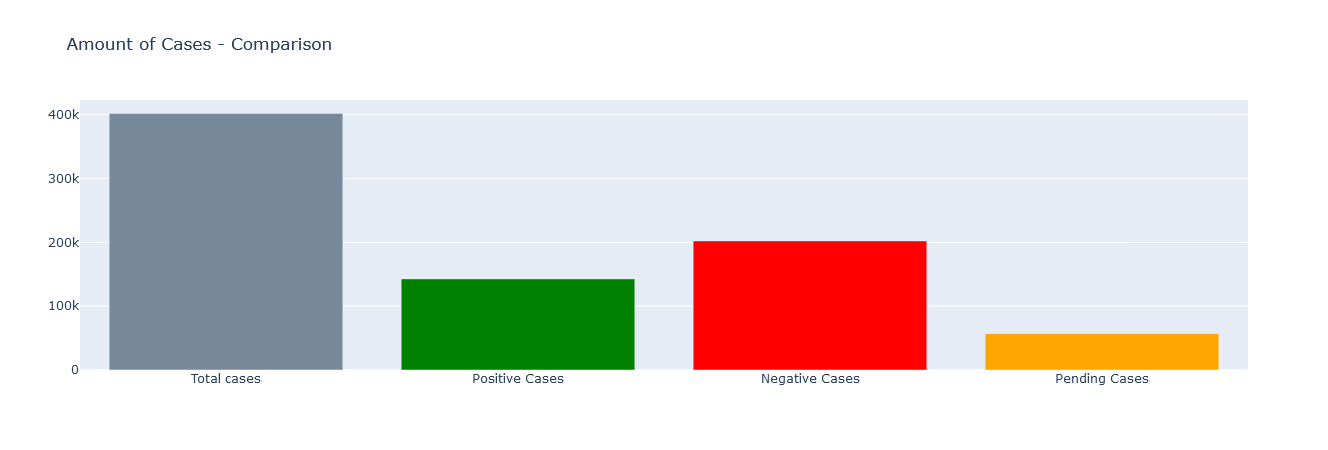

In [27]:
colors = ['lightslategray', 'Green', 'Red', 'orange']
fig = go.Figure([go.Bar(x=['Total cases', 'Positive Cases', 'Negative Cases', 'Pending Cases'],
                        y=[len(df), len(df_positive), len(df_negative), len(df_pending)],
                        marker_color=colors)]) # marker color can be a single color value or an iterable
fig.update_layout(
    title='Amount of Cases - Comparison')
fig.show()

# Cases per Sex

HOMBRE Cases: 79280 (55.56100637746163%)
MUJER Cases: 63410 (44.43899362253837%)


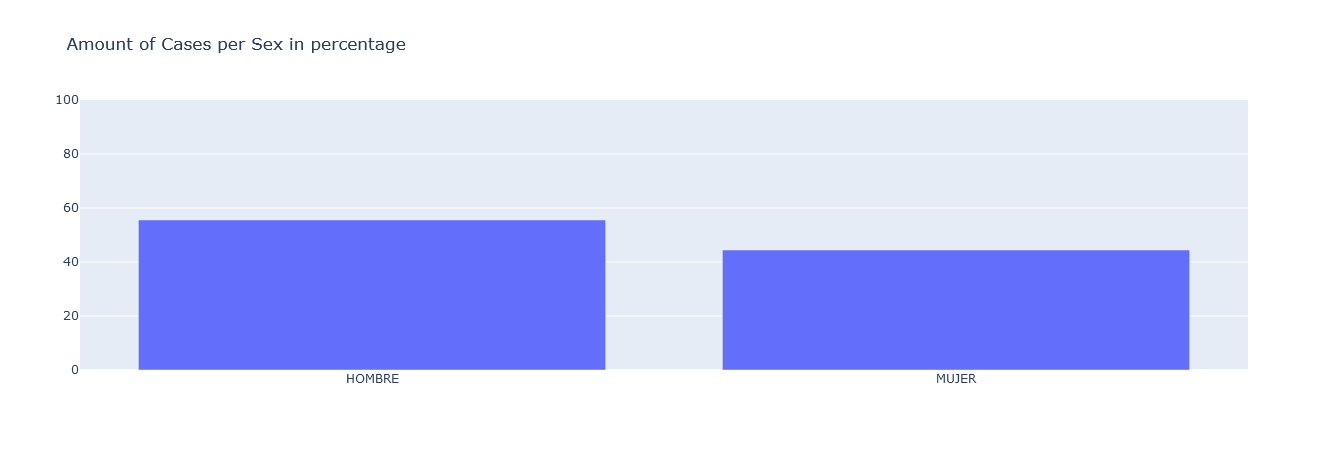

In [42]:
x = []
y = []
for gender, genderCases in dataFunctions.getCasesPerSex(df_positive):
    percentage = (genderCases / len(df_positive)) * 100
    genderName = resolveFunctions.resolveGender(df_cataloge, gender)
    print("{gender} Cases: {cases} ({perc}%)".format(gender=genderName, cases=genderCases, perc=percentage))
    x.append(genderName)
    y.append(percentage)
    
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(
    title='Amount of Cases per Sex in percentage',
    yaxis={"range" : [0, 100]})
fig.show()

# Positive cases per Age group

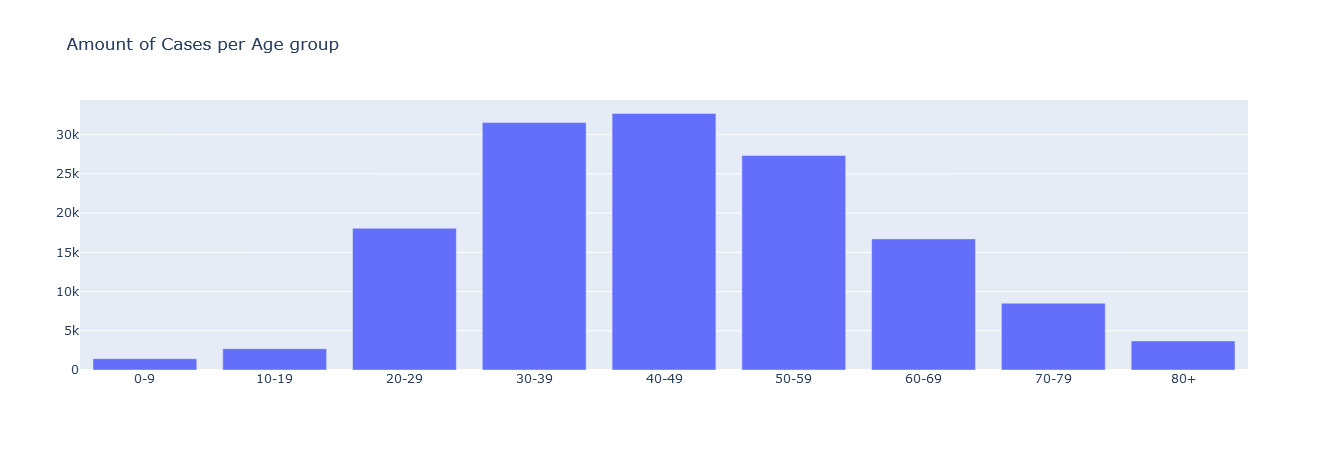

In [46]:
ageGroups = [[0,9], [10,19], [20,29], [30,39], [40,49], [50,59], [60,69], [70,79], [80, -1]]
ageGroupsLabel = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
y = []
for startAge, endAge in ageGroups:
    casesPerAgeGroup = dataFunctions.getCasesPerAgeGroup(df=df_positive, startAge=startAge, endAge=endAge)
    y.append(casesPerAgeGroup)
    
fig = go.Figure(data=[go.Bar(x=ageGroupsLabel, y=y)])
fig.update_layout(
    title='Amount of Cases per Age group',
    )
fig.show()

# Positive cases per state